<h2>1. Изучение и подготовка данных</h2>

In [1]:
import pandas as pd
data_c = pd.read_csv('/datasets/calls.csv')
print(data_c.info())
data_c.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
data_c['call_date'] = pd.to_datetime(data_c['call_date']).dt.month

в принципе, на этом, (для данного датафрейма) все. относительно нулей в столбце duration у меня есть идея о том, что
они возникали, когда пользователь сбрасывал звонок, абонент не брал трубку или сбрасывал, когда время ожидания подходило к концу
из даты здесь и везде далее понадобится лишь месяц

In [3]:
data_i = pd.read_csv('/datasets/internet.csv', index_col=0)
print(data_i.info())
data_i.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [4]:
import numpy as np
data_i['session_date'] = pd.to_datetime(data_i['session_date'])

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


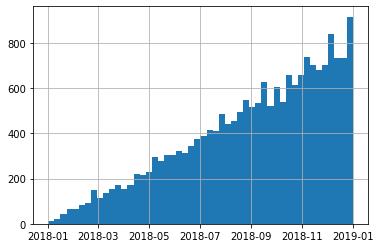

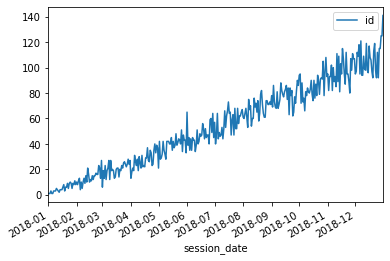

In [5]:
data_i[data_i['mb_used']==0]['session_date'].hist(bins=50)
data_i[data_i['mb_used']==0].pivot_table(index='session_date', values = 'id', aggfunc='count').plot()
check1 = data_i[data_i['mb_used']==0].pivot_table(index='session_date', values = 'id', aggfunc='count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
Коэффициент корреляции между числом пользователей на момент времени и числом возникновений значения 0.0 в столбце"mb_used" таблицы data_u 0.9757987669401489


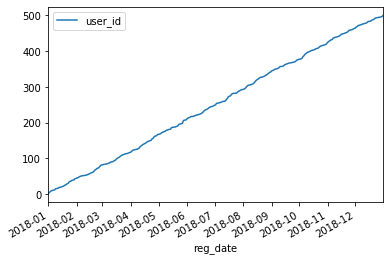

In [6]:
data_u = pd.read_csv('/datasets/users.csv')
print(data_u.info())
print(data_u.describe())

data_u.head()
data_u['churn_date'], data_u['reg_date'] = pd.to_datetime(data_u['churn_date']), pd.to_datetime(data_u['reg_date'])
def replacement(row):
    if row['tariff'] == 'smart':
        row['tariff'] = 0
    if row['tariff'] == 'ultra':
        row['tariff'] = 1
    return row
data_u = data_u.apply(replacement, axis=1)
data_u
check = data_u.pivot_table(index='reg_date', values='user_id', aggfunc='count')
for i in range(1,check.shape[0]):
    check.iloc[i,0] = check.iloc[i,0] + check.iloc[i-1,0]
check.plot()
print('Коэффициент корреляции между числом пользователей на момент времени и числом возникновений значения 0.0 в столбце\
"mb_used" таблицы data_u', check1['id'].corr(check['user_id']))

очевидна связь между ростом числа потребителей и ростом технических проблем: я буду предполагать, что нулевые значения это сбои в работе сервисов, а не ошибки в данных, тк в противном случае (поскольку нулевых значений около 10%) выборка вполне вероятно может быть не представительной => мы не можем делать какие то выводы, используя эту выборку


In [7]:
data_i['session_date'] = pd.to_datetime(data_i['session_date']).dt.month
data_m = pd.read_csv('/datasets/messages.csv')
print(data_m.info())
print(data_m.describe())
data_m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
data_m['message_date'] = pd.to_datetime(data_m['message_date']).dt.month 

In [9]:
data_t = pd.read_csv('/datasets/tariffs.csv') 
data_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
data_u = pd.read_csv('/datasets/users.csv')
print(data_u.info())
print(data_u.describe())

data_u

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [11]:
data_u['churn_date'], data_u['reg_date'] = pd.to_datetime(data_u['churn_date']), pd.to_datetime(data_u['reg_date'])
data_u = data_u.apply(replacement, axis=1)
data_u

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,1
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,1
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,0
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,0


<h2>2. Анализ данных</h2>

In [12]:
chr_c_tme = data_c[data_c['duration']>0].pivot_table(index='user_id', columns='call_date', values='duration', aggfunc='sum')
chr_c_cunt = data_c[data_c['duration']>0].pivot_table(index='user_id', columns='call_date', values='duration', aggfunc='count')

chr_m = data_m.pivot_table(index='user_id', columns='message_date', values='id', aggfunc='count')
chr_i = data_i.pivot_table(index='user_id', columns='session_date', values='mb_used', aggfunc='sum')

chr_c_tme = data_u[['tariff', 'user_id']].merge(chr_c_tme, left_on='user_id', right_index=True, how='outer')
chr_c_cunt = data_u[['tariff', 'user_id']].merge(chr_c_cunt, left_on='user_id', right_index=True, how='outer')
chr_i = data_u[['tariff', 'user_id']].merge(chr_i, left_on='user_id', right_index=True, how='outer')
chr_m = data_u[['tariff', 'user_id']].merge(chr_m, left_on='user_id', right_index=True, how='outer')

def overdrft(row, param):
    for i in range(1,13):
        row[i] = (row[i]-data_t[param][row['tariff']])
    return row
chr_c_tme_over = chr_c_tme.apply(overdrft, axis = 1, param='minutes_included')
chr_i_over = chr_i.apply(overdrft, axis = 1, param='mb_per_month_included')
chr_m_over = chr_m.apply(overdrft, axis = 1, param='messages_included')
chr_c_tme_over['tariff'] = chr_c_tme_over['tariff'].astype('int64')
chr_i_over['tariff'] = chr_i_over['tariff'].astype('int64')
chr_m_over['tariff'] = chr_m_over['tariff'].astype('int64')
chr_i_over

,tariff,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1000.0,NaN,NaN,NaN,NaN,-28466.51,-7486.23,-16716.36,-16664.07,-16151.09,-16017.51,-15963.53,-20902.39
1,0,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3069.34,-1323.34
2,0,1002.0,NaN,NaN,NaN,NaN,NaN,-4503.18,2220.10,4959.26,1331.08,-1471.75,3227.28,2753.73
3,1,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22154.79,-18251.13,-15951.86,-19363.11,-20598.47
4,1,1004.0,NaN,NaN,NaN,NaN,-17316.02,-13119.98,-8490.42,-2135.63,-15610.97,-12244.56,-15103.98,-12698.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28105.93,2347.62,-1357.00,8219.11,-7293.24
496,0,1496.0,-11597.27,13129.67,9599.0,5714.67,8349.75,4774.31,9004.76,8170.03,11574.65,12823.17,9703.40,5376.15
497,0,1497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3859.71,-1203.92,4558.60
498,0,1498.0,NaN,NaN,NaN,NaN,NaN,NaN,-7883.76,8875.21,6774.41,5219.36,NaN,NaN


не думаю, что нужно принимать решение о каких то изменениях тарифов, используя информацию о несовершенных звонках ведь неважно, какова была цель звонка, продолжительностью 0.0 секунд, она не была достигнута в любом случае к тому же, если человек не дозвонился, он вполне вероятно совершит еще 2-3 или более безрезультатных звонка, так что можно даже считать эти звонки информационным шумом

<h4> Здесь (ниже) я проверил свою гипотезу о том, что если возникли пропуски то, поскольку я ранее выполнял сложение датафреймов с предосторожностями на случай пропущенных значений (аргумент fill_value=True), пропуски в sample1 и sample2 могли возникнуть только благодаря тому что в новодобавленных (после изменения how в объединении с right на outer) (2х из 3х) вообще не было никаких значений о потреблении, так что можно их выбросить</h4>

In [13]:
def revenue(row, overp):
    for i in range(1,13):
        if row[i] < 0:
            row[i] = 0
    for i in range(1,13):
        row[i] = row[i] * data_t[overp][row['tariff']]
        if overp=='rub_per_gb':
            row[i]/=1024
    return row
chr_c_tme_revenue = chr_c_tme_over.apply(revenue, overp='rub_per_minute', axis=1)
chr_m_revenue = chr_m_over.apply(revenue, overp='rub_per_message', axis=1)
chr_i_revenue = chr_i_over.apply(revenue, overp='rub_per_gb', axis=1)
chr_c_tme_revenue['tariff'] = chr_c_tme_over['tariff'].astype('int64')
chr_i_revenue['tariff'] = chr_i_over['tariff'].astype('int64')
chr_m_revenue['tariff'] = chr_m_over['tariff'].astype('int64')
print(chr_i_revenue.iloc[371],
chr_m_revenue.iloc[371],
chr_c_tme_revenue.iloc[371],
chr_i_revenue.iloc[128],
chr_m_revenue.iloc[128],
chr_c_tme_revenue.iloc[128])

tariff        0.0
user_id    1371.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
Name: 371, dtype: float64 tariff        0.0
user_id    1371.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
Name: 371, dtype: float64 tariff        0.0
user_id    1371.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
Name: 371, dtype: float64 tariff        1.0
user_id    1128.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8   

In [14]:
from functools import reduce
def sumdf(df1,df2):
    for i in range(1,13):
        df1[:][i] = df1[:][i].add(df2[:][i], fill_value=True)
    return df1
chr_rs = [chr_i_revenue, chr_c_tme_revenue, chr_m_revenue]
revenues = reduce(sumdf, chr_rs) 
revenues
revenues.iloc[371]

tariff        0.0
user_id    1371.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
Name: 371, dtype: float64

In [15]:
def addfee(row):
    for i in range(1,13): 
        if row['tariff'] == 0:
            row[i]+=550
        if row['tariff']==1:
            row[i] += 1950
    return row
revenues_wf = revenues.apply(addfee, axis=1)
revenues_wf.iloc[371]

tariff        0.0
user_id    1371.0
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
Name: 371, dtype: float64

,var,std,mean
0,643.336613,25.364081,31.625000
1,1780.672066,42.198010,46.166667


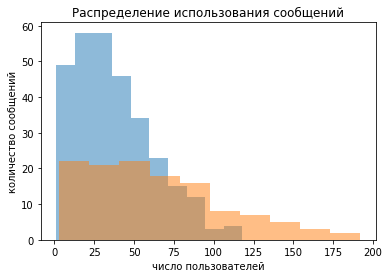

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_m = chr_m.groupby('tariff').median().drop('user_id', axis=1).T.mean()#да мб с точки зрения статистики
#найти средние по месяцам а потом найти среднее от среднего не комильфо, но условие весьма неоднозначное,
#сделал как понял
import numpy as np
var_m = chr_m.groupby('tariff').var().drop('user_id', axis=1).T.mean() #mean здесь и выше использовал потому что данн
#ые не очень отличаются, да и по идее не могут сильно различаться данные о потреблении всяческих услуг связи в 
#разные времена года
std_m = np.sqrt(var_m)
chrcs = pd.DataFrame(index = ['var', 'std', 'mean'], data=[list(var_m), list(std_m), list(mean_m)]).T
hist_data_m = pd.DataFrame([chr_m['tariff'], chr_m.drop(['tariff', 'user_id'], axis=1).T.mean()]).T
hist_data_m['tariff'] = hist_data_m['tariff'].astype('int64')
hist_data_m.columns = ['tariff', 'mean_by_month']
axs = plt.subplots()
axs[1].hist(hist_data_m[hist_data_m['tariff']==0]['mean_by_month'], alpha=0.5)
axs[1].hist(hist_data_m[hist_data_m['tariff']==1]['mean_by_month'], alpha=0.5)
axs[1].set_xlabel('число пользователей')
axs[1].set_ylabel('количество сообщений')
axs[1].set_title('Распределение использования сообщений')
chrcs

,var,std,mean
0,29804.508083,172.639822,366.0600
1,79027.494616,281.118293,451.9225


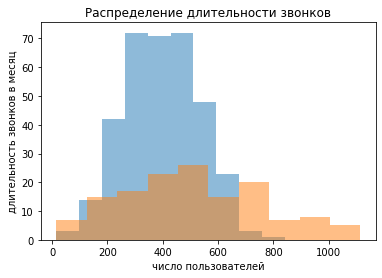

In [17]:
mean_c_tme = chr_c_tme.groupby('tariff').median().drop('user_id', axis=1).T.mean()
var_c_tme = chr_c_tme.groupby('tariff').var().drop('user_id', axis=1).T.mean() 
std_c_tme = np.sqrt(var_c_tme)
chrcs = pd.DataFrame(index = ['var', 'std', 'mean'], data=[list(var_c_tme), list(std_c_tme), list(mean_c_tme)]).T
hist_data_c_tme = pd.DataFrame([chr_c_tme['tariff'], chr_c_tme.drop(['tariff', 'user_id'], axis=1).T.mean()]).T
hist_data_c_tme['tariff'] = hist_data_c_tme['tariff'].astype('int64')
hist_data_c_tme.columns = ['tariff', 'mean_by_month']
axs = plt.subplots()
axs[1].hist(hist_data_c_tme[hist_data_c_tme['tariff']==0]['mean_by_month'], alpha=0.5)
axs[1].hist(hist_data_c_tme[hist_data_c_tme['tariff']==1]['mean_by_month'], alpha=0.5)
axs[1].set_xlabel('число пользователей')
axs[1].set_ylabel('длительность звонков в месяц')
axs[1].set_title('Распределение длительности звонков')
chrcs

,var,std,mean
0,3.351697e+07,5789.384208,15212.521250
1,9.479840e+07,9736.446846,18083.740417


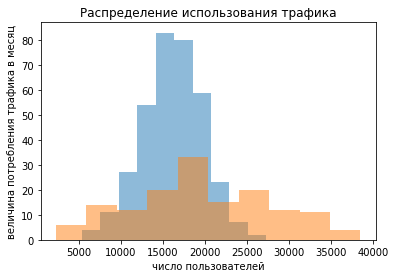

In [18]:
mean_i = chr_i.groupby('tariff').median().drop('user_id', axis=1).T.mean()
var_i = chr_i.groupby('tariff').var().drop('user_id', axis=1).T.mean() 
std_i = np.sqrt(var_i)
chrcs = pd.DataFrame(index = ['var', 'std', 'mean'], data=[list(var_i), list(std_i), list(mean_i)]).T

hist_data_i = pd.DataFrame([chr_i['tariff'], chr_i.drop(['tariff', 'user_id'], axis=1).T.mean()]).T
hist_data_i['tariff'] = hist_data_i['tariff'].astype('int64')
hist_data_i.columns = ['tariff', 'mean_by_month']
axs = plt.subplots()
axs[1].hist(hist_data_i[hist_data_i['tariff']==0]['mean_by_month'], alpha=0.5)
axs[1].hist(hist_data_i[hist_data_i['tariff']==1]['mean_by_month'], alpha=0.5)
axs[1].set_xlabel('число пользователей')
axs[1].set_ylabel('величина потребления трафика в месяц')
axs[1].set_title('Распределение использования трафика')
chrcs

распределения: визуально данные о среднемесячном количестве сообщений напоминают пуассоновское распределение, данные о среднемесячном времени звонков и о среднемесячном потреблении -- нормальное. Это кажется вполне естественным, тк количество смс -- дискретная величина, а прочие -- непрерывные


In [19]:
revenues_mean = pd.DataFrame(
    revenues_wf.drop(['tariff', 'user_id'], axis=1).mean(axis=1)).join( 
     [revenues_wf['user_id']])
revenues_mean.columns = ['mean_revenue', 'user_id']
revenues_mean['user_id'] = revenues_mean['user_id'].astype('int64')
revenues_mean = revenues_mean.merge(data_u, on='user_id', how='left')
revenues_mean[revenues_mean['mean_revenue'].isna()==True]

,mean_revenue,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,NaN,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,1
371,NaN,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,0


<h2>3. Проверка гипотез</h2>

In [20]:
from scipy import stats as st
ALPHA = 0.05
#проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
#H0 = "средняя выручка пользователей тарифов Ультра» и «Смарт» одинаковая"
sample1 = revenues_mean[['mean_revenue', 'tariff']][revenues_mean[['mean_revenue', 'tariff']]['tariff']==1]['mean_revenue']
sample2 = revenues_mean[['mean_revenue', 'tariff']][revenues_mean[['mean_revenue', 'tariff']]['tariff']==0]['mean_revenue']
sample1, sample2 = sample1.dropna(), sample2.dropna()
results = st.ttest_ind(sample1, sample2)
print(results.pvalue)
if (results.pvalue < ALPHA):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(results.pvalue)

5.021018287274905e-52
Отвергаем нулевую гипотезу
5.021018287274905e-52


In [21]:
#проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
#H0 = "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"
sample1 = revenues_mean[['mean_revenue', 'city']][revenues_mean[['mean_revenue', 'city']]['city']=='Москва']['mean_revenue']
sample2 = revenues_mean[['mean_revenue', 'city']][revenues_mean[['mean_revenue', 'city']]['city']!='Москва']['mean_revenue']
sample1, sample2 = sample1.dropna(), sample2.dropna()
results = st.ttest_ind(sample1, sample2)
print(results.pvalue)
if (results.pvalue < ALPHA):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(results.pvalue)

0.4147816956675784
Не получилось отвергнуть нулевую гипотезу
0.4147816956675784


# Вывод:
+ Средняя выручка по городам не различается, и это вполне естественно, что в цифровую эпоху жители Стерлитамака в среднем тратят на связь суммы аналогичные расходам жителей Москвы
+ Средняя выручка по тарифам различается, это означает то что в среднем потребители не полностью расходуют пакеты трафика, минут и смс (если бы пользователи тарифа смарт переплачивали больше разницы в цене между двумя тарифами, они бы в скором времени перешли на тариф ультра). Действительно, гистограммы демонстрируют, что пользователям хватило бы меньшего количества трафика, минут и смс. Более того, большинству клиентов для удовлетворения их потребностей в звонках и смс, того количества, которое предоставляется по тарифу смарт. С трафиком ситуация несколько иная, но тем не менее пик -- 20000 гораздо меньше максимума по пакету ультра. Очевидно, что многие покупают тариф ультра с ненужными им минутами и смс, чтобы не переплачивать за интернет. 
Из всего вышесказанного, итог: нужно рекламировать тариф ультра.

*p.s. Вообще, выводы максимально логичны: чтобы достичь впечатляющих финансовых показателей, нужно продавать людям профицитный (=дешевый) товар по завышенной стоимости, мб лучше еще больше урезать тариф смарт?*